# Simple Linear Regression

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=CtKeHnfK5uA')

**Linear regression** performed on the dataset *food_truck_profit.csv*.  
The first column is the population of a city and the second column is the profit of a food truck in that city.  
A negative value for profit indicates a loss. Values are given in 10,000s of dollars.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import linear_model     # linear_model.LinearRegression
from sklearn import model_selection  # model_selection.train_test_split
from sklearn import metrics          # metrics.mean_squared_error, metrics.r2_score

%matplotlib inline

### Helper function

In [3]:
def show_linear_regression_model_as_str(function_name, w1, w0=None):
    """
    function_name = f
    w0 = 4
    w0 = 1.5
    Function will return "f_w(x) = 4 + 1.5 * x"
    :param function_name: Name of the regression function (for example f)
    :param w1: Constant which will multiply x
    :param w0: Constant that will be added (intercept)
    :return:
    """
    if w0:
        return "%s_w(x) = %f + %f * x" % (function_name, w0, w1)
    else:
        return "%s_w(x) = %f * x" % (function_name, w1)

In [4]:
show_linear_regression_model_as_str("f", 4, 1.5)

'f_w(x) = 1.500000 + 4.000000 * x'

In [5]:
show_linear_regression_model_as_str("g", 4)

'g_w(x) = 4.000000 * x'

### Load our dataset

In [6]:
df = pd.read_csv('../datasets/food_truck_profit.csv')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
x = df['population']  

In [10]:
type(x)

pandas.core.series.Series

In [11]:
x.shape

(97,)

In [12]:
x = x.values.reshape(-1, 1)

In [13]:
x.shape

(97, 1)

In [14]:
y = df['profit']  
y = y.values.reshape(-1, 1)

### Split the data

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3)

### Construct a linear regression model and perform the training process

In [16]:
r = linear_model.LinearRegression()

In [17]:
r.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
show_linear_regression_model_as_str("f", w1=r.coef_[0][0], w0=r.intercept_[0])

'f_w(x) = -3.840296 + 1.179626 * x'

### Evaluate model

In [19]:
y_train_pred = r.predict(x_train)
y_test_pred = r.predict(x_test)

In [20]:
metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred)

6.207173009826528

In [21]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred)

15.106410965815932

In [22]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.7805667197921807

In [23]:
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.5531257262570055

### Construct a linear regression model without using w_0

In [24]:
r2 = linear_model.LinearRegression(fit_intercept=False)

In [25]:
r2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [26]:
show_linear_regression_model_as_str("g", w1=r2.coef_[0][0])

'g_w(x) = 0.804695 * x'

### Evaluate second model

In [27]:
y_train_pred2 = r2.predict(x_train)
y_test_pred2 = r2.predict(x_test)

In [28]:
metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred2)

8.946589472326407

In [29]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred2)

17.906495287555405

In [30]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred2)

0.6837240606186694

In [31]:
metrics.r2_score(y_true=y_test, y_pred=y_test_pred2)

0.4702942945868366

### Visualise our models

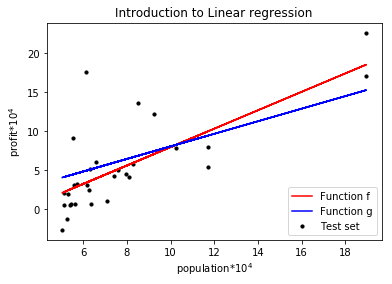

In [32]:
plt.scatter(x_test, y_test, c='k', s=10, label='Test set')
plt.plot(x_test, y_test_pred, c='r',label='Function f')
plt.plot(x_test, y_test_pred2, c='b', label='Function g')

plt.xlabel('population*$10^4$')
plt.ylabel('profit*$10^4$')
plt.title('Introduction to Linear regression')
plt.legend()
   
plt.show()